# Traçando gráficos com matplotlib
Usando matplotlib para criar gráficos de barras que permitam visualizar as conclusões que tirou-se com groupby e query

In [9]:
# Imports e carregamento do dataset
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('winequality_edited.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual_sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Baixo
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Moderado
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Médio
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Moderado
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Baixo


In [29]:
# Usando query para selecionar cada grupo e obter sua qualidade média
median = df['alcohol'].median()
low = df.query('alcohol < @median')
high = df.query('alcohol >= @median')

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

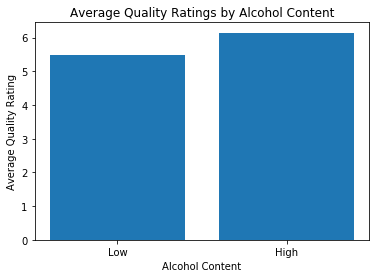

In [30]:
# Criando gráfico de barras com rótulos adequados
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']

plt.bar(locations, heights, tick_label = labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### Vinhos mais suaves recebem avaliações melhores?
Criando um gráfico de barras com uma barra para amostras de vinho com baixo nível de açúcar residual e outra para amostras com alto nível de açúcar residual.

In [31]:
# Usando query para selecionar cada grupo e obter sua qualidade média
median_sugar = df['residual_sugar'].median()
low_sugar = df.query('residual_sugar < @median_sugar')
high_sugar = df.query('residual_sugar >= @median_sugar')

mean_quality_low_sugar = low_sugar['quality'].mean()
mean_quality_high_sugar = high_sugar['quality'].mean()

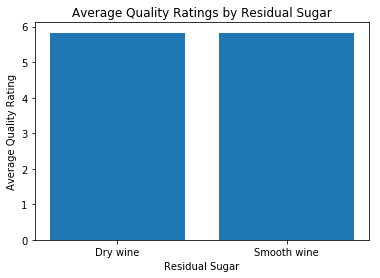

In [32]:
# Criando um gráfico de barras com rótulos adequados
labels = ['Dry wine', 'Smooth wine']
heights = [mean_quality_low_sugar, mean_quality_high_sugar]

plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating');

### Qual o nível de acidez que recebe a maior avaliação média?
Criando um gráfico de barras com uma barra para cada um dos quatro níveis de acidez

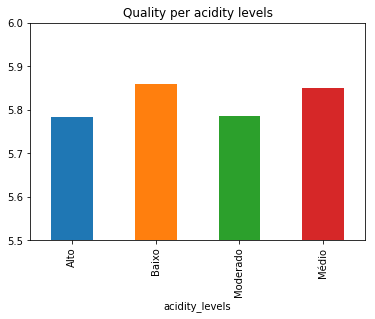

In [36]:
# usando groupby para obter a qualidade média para cada nível de acidez
sel = df.groupby('acidity_levels')['quality'].mean().plot(kind='bar', ylim=(5.5, 6), title='Quality per acidity levels');

#### Gráfico de linha

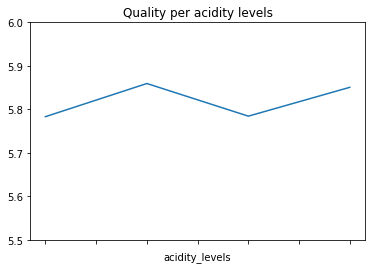

In [37]:
sel = df.groupby('acidity_levels')['quality'].mean().plot(kind='line', ylim=(5.5, 6), title='Quality per acidity levels');